### 기하학적 분포를 가지는 데이터 세트에 DBSCAN으로 군집화

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    temp_df = dataframe
    target_list = np.unique(temp_df[label_name])
    
    if iscenter==True:
        centers = clusterobj.cluster_centers_
    
    markers=['o', 's', '^', 'P', 'D', 'H', 'x']
    
    for target in target_list:
        target_cluster = temp_df[temp_df[label_name]==target]
        plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='K', marker=markers[target])
        
        if iscenter==True:
            center_x_y = centers[target]         
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[target])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % target)
    
    plt.show()

<ipython-input-3-bd27934a838a>:12: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='K', marker=markers[target])


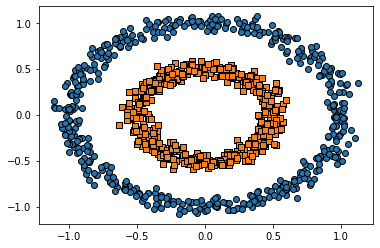

In [4]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

### KMeans Clustering

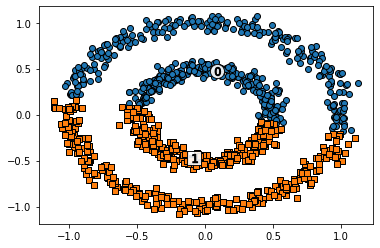

In [7]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)

### GMM Clustering

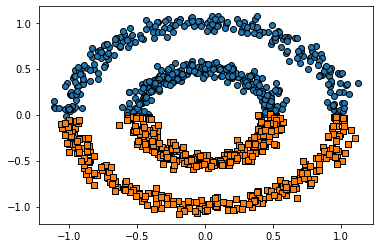

In [9]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
cluster_df['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

### DBSCAN

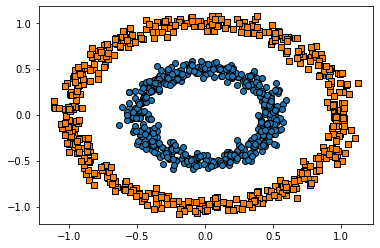

In [10]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)